## Importing Libraries


In [1]:
import pandas as pd                         # data manipulation
import numpy as np                          # numerical operations
import matplotlib.pyplot as plt             # basic plotting
import seaborn as sns                       # statistical vizualisation
from sklearn.preprocessing import StandardScaler

## Loading Our Data

We will start the exploration with the [height and weight data from Kaggle](https://www.kaggle.com/datasets/mustafaali96/weight-height).

In [3]:
# mount Google Drive
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify the folder you want to access
project_folder = "/content/drive/My Drive/Colab Notebooks/"

Mounted at /content/drive


In [4]:
file_path = os.path.join(project_folder, "weight-height.csv")

df = pd.read_csv(file_path)

## What's in the data?

In [5]:
# dimensions of the dataframe
print(df.shape)

# display the top 5 rows
df.head(10)

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## Visualizing the Data

### Let's visualize the data to better understand the factor of gender in height and weight

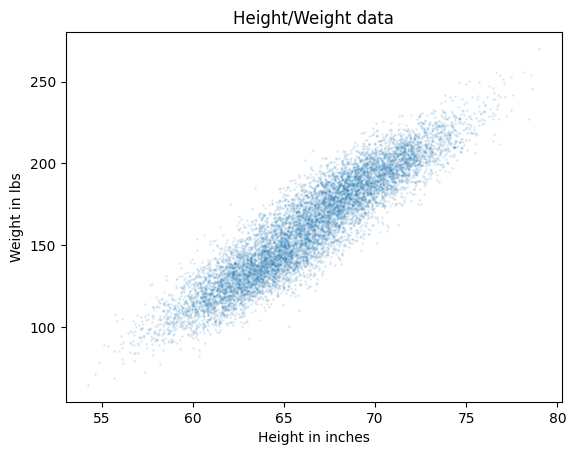

In [8]:
# Generate scatter plot of height and weight
plt.scatter(df.Height, df.Weight, s=1, alpha=0.1)
plt.xlabel('Height in inches')
plt.ylabel('Weight in lbs')
plt.title('Height/Weight data')
plt.show()

Do these look correlated?

If so, in what direction?


In [9]:
# Select only numeric columns for correlation calculation
num_df = df.select_dtypes(include=np.number)

# Let's check correlation
num_df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


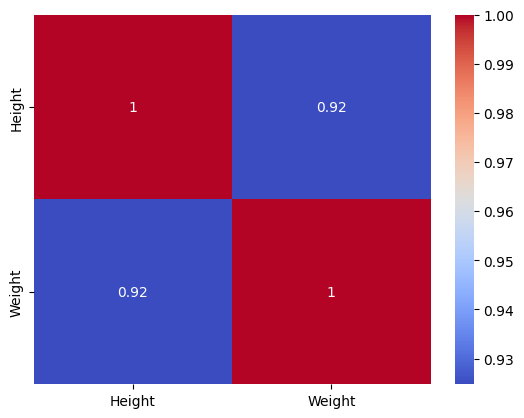

In [10]:
# plot the correlations
sns.heatmap(num_df.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

Does this confirm our evaluation from the scatterplot?

#### Group by Gender

Let's see how the data looks when we consider the categories included in gender

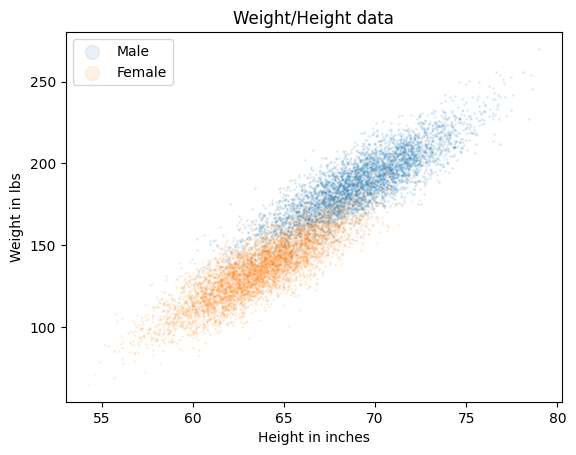

In [11]:
for gender in df.Gender.unique():
    g_df = df[df.Gender == gender]
    plt.scatter(g_df.Height, g_df.Weight, s=1, alpha=0.1, label=gender)
plt.legend(markerscale=10)
plt.xlabel('Height in inches')
plt.ylabel('Weight in lbs')
plt.title('Weight/Height data')
plt.show()

What do you see?

Any clusters? If so, what do they indicate?

#### Explore the Distributions

Let's look at the distributions of the variables all together then by gender

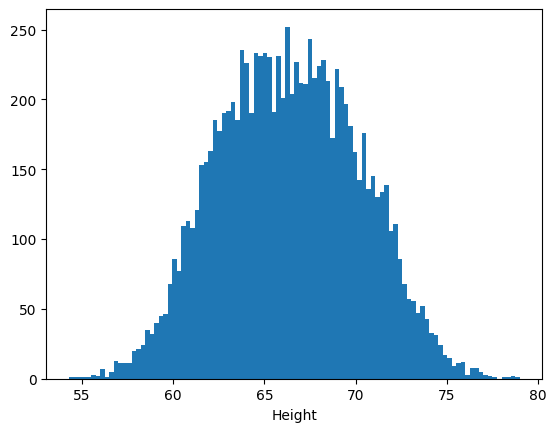

In [12]:
plt.hist(df.Height, bins=100)
plt.xlabel('Height')
plt.show()

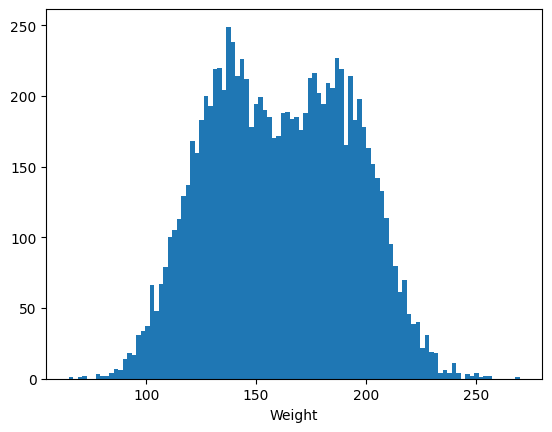

In [13]:
plt.hist(df.Weight, bins=100)
plt.xlabel('Weight')
plt.show()

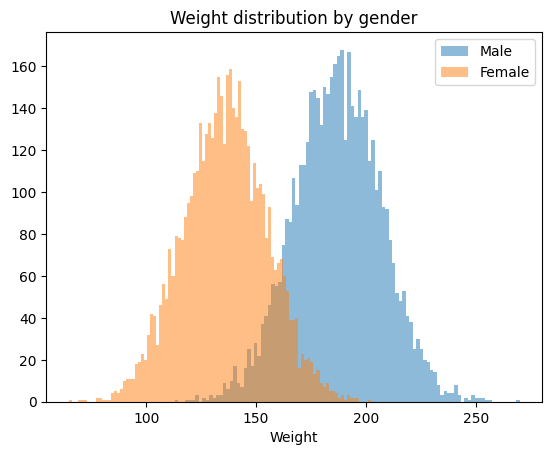

In [14]:
for gender in df.Gender.unique():
    g_df = df[df.Gender == gender]
    plt.hist(g_df.Weight, bins=100, alpha=0.5, label=gender)
plt.xlabel('Weight')
plt.legend()
plt.title('Weight distribution by gender')
plt.show()

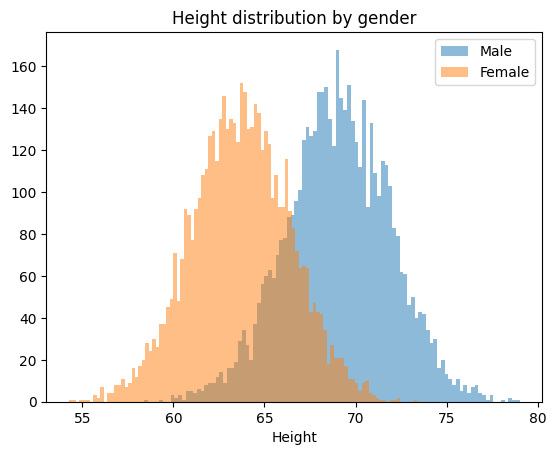

In [15]:
for gender in df.Gender.unique():
    g_df = df[df.Gender == gender]
    plt.hist(g_df.Height, bins=100, alpha=0.5, label=gender)
plt.xlabel('Height')
plt.legend()
plt.title('Height distribution by gender')
plt.show()

What types of distributions are we looking at for each variable? For each gender by variable?

## Using *k*-Means to Find Clusters

With *k*-Means we need to select the number of clusters at the start.

Before we begin...what natural gropuings to you expect to see with respect to height and weight?

Let's say we didn't have a good sense of the number and just started with a random number---4.

### Scale the Data First

In [16]:
# Select features for clustering (Height and Weight)
features = ['Height', 'Weight']

# Standardize Height and Weight
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Convert scaled features back to a DataFrame and retain Gender for visualization
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df['Gender'] = df['Gender'].values  # Add Gender back to the DataFrame for labeling

# Display the updated DataFrame
scaled_df.head()

,Height,Weight,Gender
0,1.944061,2.505797,Male
1,0.627537,0.027101,Male
2,2.012443,1.597806,Male
3,1.394060,1.825222,Male
4,0.913421,1.398750,Male


In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df[['Height', 'Weight']])


# `.fit()` trains the KMeans algorithm on the dataset.
# `df.iloc[:, 1:]` selects all rows and all columns starting from the second column in the DataFrame `df`.
# `iloc` is used for index-based selection.
# `[:, 1:]` means we're excluding the first column (which is gender that isn't useful for clustering).
# We make sure the data passed to KMeans contains only numeric values because KMeans is a distance-based algorithm.


kmeans.labels_

#`.labels_` returns the cluster assignments for each data point in the dataset.
# Each data point is assigned a cluster label (0, 1, 2, or 3 in this case because we specified `n_clusters=4`).
# Example: If `kmeans.labels_` returns `[0, 1, 1, 2, 0, 3, ...]`, this means:
# The first data point belongs to Cluster 0.
# The second and third data points belong to Cluster 1.
# The fourth data point belongs to Cluster 2, and so on.


array([2, 0, 2, ..., 3, 0, 1], dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[ 0.39327459,  0.46531325],
       [-1.37004541, -1.35021024],
       [ 1.37090619,  1.34391082],
       [-0.45428143, -0.52031228]])

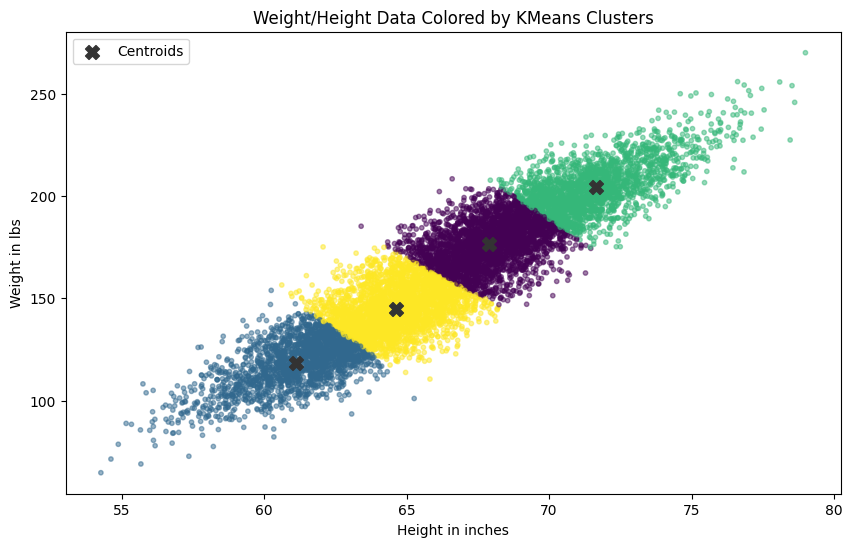

In [19]:
# Assign cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Reverse the scaling for cluster centers to match original data scale
centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the data points colored by their cluster assignments
plt.figure(figsize=(10, 6))

# Plot data points using original Height and Weight, colored by cluster assignments
plt.scatter(df['Height'], df['Weight'], c=df['Cluster'], s=10, alpha=0.5)

# Plot cluster centers in the original scale
plt.scatter(centers_original_scale[:, 0], centers_original_scale[:, 1],
            s=100, color='#333333', marker='X', label='Centroids')

# Add plot labels and title
plt.legend()
plt.xlabel('Height in inches')
plt.ylabel('Weight in lbs')
plt.title('Weight/Height Data Colored by KMeans Clusters')

plt.show()

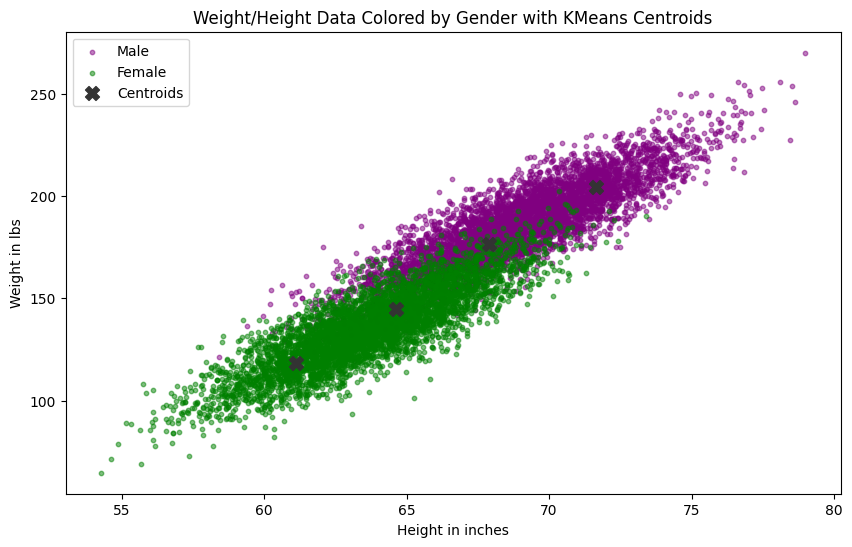

In [20]:
# Reverse the scaling of cluster centers to match original Height and Weight
centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

# Plotting the data with gender labels and corrected cluster centers
plt.figure(figsize=(10, 6))

# Use the same colormap (e.g., 'viridis') for gender
colors = {'Male': 'purple', 'Female': 'green'}  # Adjust these as needed

# Plot data points colored by Gender
for gender in df.Gender.unique():
    g_df = df[df.Gender == gender]
    plt.scatter(g_df.Height, g_df.Weight, s=10, alpha=0.5, label=gender, color=colors[gender])

# Plot cluster centers (now scaled back to match original data)
plt.scatter(centers_original_scale[:, 0], centers_original_scale[:, 1],
            s=100, color='#333333', marker='X', label='Centroids')

# Add plot labels and title
plt.legend(markerscale=1)
plt.xlabel('Height in inches')
plt.ylabel('Weight in lbs')
plt.title('Weight/Height Data Colored by Gender with KMeans Centroids')

plt.show()

### Systematic Determination for Whether 4 is a Good Number of Clusters

Start with the elbow method...remember this from PCA?

In [21]:
kmeans.inertia_

2563.5230567011604

In [22]:
# Iterate over a range of k values (number of clusters) and compute inertia for each k
kminertia = pd.DataFrame(data=[], index=range(2, 21), columns=['inertia'])

for clusters in range(2,21):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(df.iloc[:,1:])
    kminertia.loc[clusters] = kmeans.inertia_

kminertia

,inertia
2,2947876.77905
3,1579865.151709
4,963880.499091
5,664496.388692
6,492000.282287
7,377349.191916
8,302858.941547
9,248774.642237
10,210904.177798
11,180296.222645


**Inertia** reflects how tightly the data points are clustered around the centroids (the sum of squared distances).

Lower inertia means tighter clusters with points closer to their centroids.

Each row above corresponds to the number of clusters and the associated intertia value.

*Intertia will always decrease as the number of clusters increases.*

We use inertia to plot it against the number of clusters to find an optimal elbow point, where adding clusters beyond this point yields diminishing returns (similar to selecting the number of components in PCA).

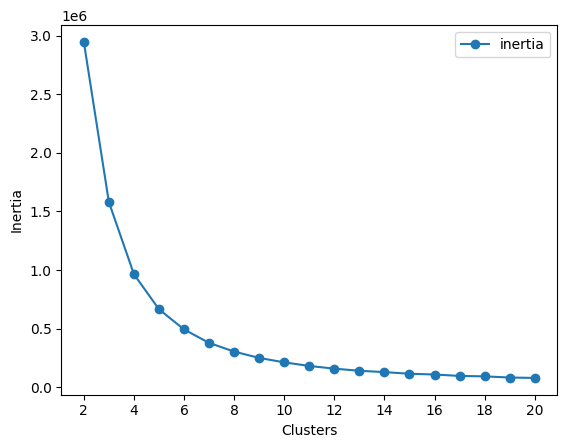

In [23]:
# Let's import this to force integers on the x-axis (otherwise it gives weird decimal half values)
from matplotlib.ticker import MaxNLocator

ax = plt.gca()

kminertia.plot(kind='line', y='inertia', ax=ax, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
# Force x-axis to display whole numbers only
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

Maybe after 6 clusters we get diminshing returns?

In [24]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df[['Height', 'Weight']])
kmeans.labels_

array([4, 2, 4, ..., 5, 2, 3], dtype=int32)

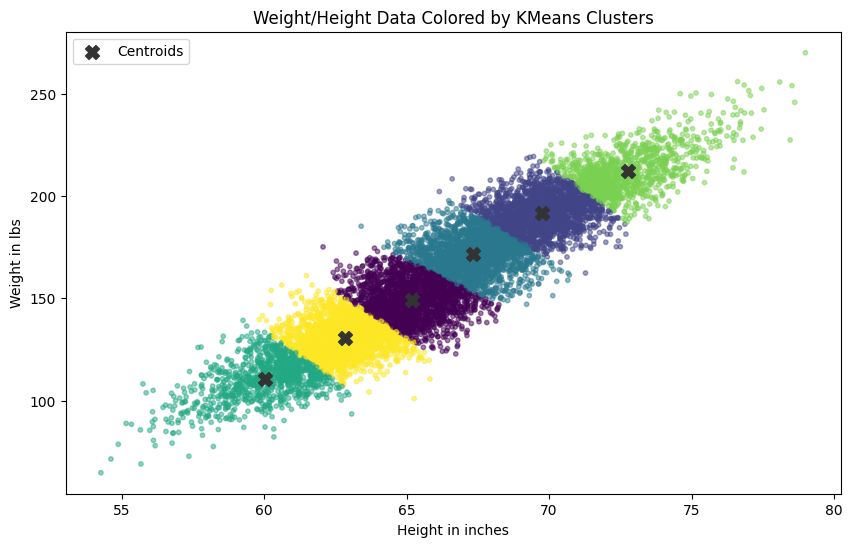

In [25]:
# Assign cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Reverse the scaling for cluster centers to match original data scale
centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the data points colored by their cluster assignments
plt.figure(figsize=(10, 6))

# Plot data points using original Height and Weight, colored by cluster assignments
plt.scatter(df['Height'], df['Weight'], c=df['Cluster'], s=10, alpha=0.5)

# Plot cluster centers in the original scale
plt.scatter(centers_original_scale[:, 0], centers_original_scale[:, 1],
            s=100, color='#333333', marker='X', label='Centroids')

# Add plot labels and title
plt.legend()
plt.xlabel('Height in inches')
plt.ylabel('Weight in lbs')
plt.title('Weight/Height Data Colored by KMeans Clusters')

plt.show()

In [26]:
kmeans.cluster_centers_

array([[-0.3112162 , -0.38595837],
       [ 0.87618533,  0.9411091 ],
       [ 0.25326588,  0.31518778],
       [-1.64745503, -1.59276425],
       [ 1.66561319,  1.58428403],
       [-0.9220682 , -0.95744376]])

In [27]:
kmeans.labels_

array([4, 2, 4, ..., 5, 2, 3], dtype=int32)

### **Interpretation of Clustering Results with 6 Clusters (Weight/Height)**

- **Is 6 Clusters a Good Choice?**
  - The effectiveness of using **6 clusters** for weight and height depends on how well the clusters represent **distinct groups** in the data.
  - If the clusters are **well-separated** and show **meaningful patterns** (e.g., age groups, gender differences, athletic vs. non-athletic individuals), this may be a good choice.
  - However, if clusters **overlap significantly** or seem **arbitrary**, it may indicate that **6 is not optimal**.

- **Potential Issues with 6 Clusters:**
  - **Overfitting**: Too many clusters might **overfit** the data, capturing noise rather than meaningful structure.
  - **Underfitting**: Too few clusters might **miss** important patterns.

Let's use the **Silhouette Score** to objectively evaluate the clustering quality.

In [28]:
from sklearn.metrics import silhouette_score

# Assuming kmeans has already been fitted with 6 clusters on weight/height data
labels = kmeans.labels_  # Cluster labels assigned by KMeans
silhouette_avg = silhouette_score(df[['Weight', 'Height']], labels)

print(f"Silhouette Score for 6 Clusters: {silhouette_avg:.4f}")

Silhouette Score for 6 Clusters: 0.2986




```
`# This is formatted as code`
```

### **Silhouette Score Interpretation**

- **Silhouette Score Range**: The score ranges from **-1 to 1**.
  - **+1**: Perfect clustering—points are far from neighboring clusters and close to their centroid.
  - **0**: Points are on the **boundary** between clusters.
  - **-1**: Poor clustering—points may be in the **wrong cluster**.

- **How to Interpret the Score?**
  - **0.5 to 1.0**: Strong, well-separated clusters.
  - **0.2 to 0.5**: Moderate clustering—may need to adjust the number of clusters.
  - **< 0.2**: Weak clustering—data may not have clear clusters, or `k` is poorly chosen.

- **Next Steps:**
  - If the silhouette score is **low**, try adjusting the number of clusters (**increase or decrease `k`**) and re-evaluate.
  - Consider plotting the **silhouette scores for different `k` values** to identify the optimal number of clusters.
    

In [29]:
# Evaluate Silhouette Scores for a range of clusters (2 to 10)
silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Weight', 'Height']])
    score = silhouette_score(df[['Weight', 'Height']], kmeans.labels_)
    silhouette_scores[k] = score

# Display silhouette scores
for k, score in silhouette_scores.items():
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

Silhouette Score for 2 clusters: 0.6109
Silhouette Score for 3 clusters: 0.5394
Silhouette Score for 4 clusters: 0.5187
Silhouette Score for 5 clusters: 0.5098
Silhouette Score for 6 clusters: 0.4976
Silhouette Score for 7 clusters: 0.4957
Silhouette Score for 8 clusters: 0.4882
Silhouette Score for 9 clusters: 0.4813
Silhouette Score for 10 clusters: 0.4800


### **Conclusion: Choosing the Optimal Number of Clusters**

### Comparing the Elbow Plot and Silhouette Score

- **Elbow Plot** shows how **inertia** (compactness of clusters) decreases as the number of clusters increases. Look for the **"elbow" point** where adding more clusters doesn't significantly reduce inertia. However, inertia **always decreases** with more clusters, which can lead to **overestimating** the optimal `k`.

- **Silhouette Score** measures how well each point fits within its cluster compared to other clusters. It considers both **compactness** and **separation**, making it more reliable when identifying **distinct clusters**.

---

### **Takeaways for Height/Weight Data:**

- The **Elbow Plot** suggested **6 clusters**, but this didn't align with the natural grouping (e.g., **2 genders**).
- The **Silhouette Score** identified **2 clusters** as optimal, reflecting meaningful real-world categories.
- **Silhouette Score** worked better here because it considers both **how close points are within clusters** and **how far apart clusters are from each other**.

---
**Best Practice**: Use **both methods together**—the Elbow Plot to narrow down `k` values and the Silhouette Score to confirm **cluster validity**.

### **Bigger Issue:**

- k-means is a tools for finding patterns in unlabeled data
- We already have clear labels (i.e., gender) so do we really need clustering?

## Let's Explore Customer Data

Thea above data doesn't make a lot of practical sense for k-means but is a good starting point for understanding the algorithm. Real-word data is typically more complex.

Now let's explore [simulated customer segmentation data from Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python).

In this analysis we will explore more than 2 columns of data in forming clusters.

Since we are clustering in higher-dimensional space, the clusters may be difficult to interpret visually.

To better understand how different variables influence our clusters, we will use PCA at the end to reduce dimensionality and visualize the results more clearly.

In [30]:
file_path = os.path.join(project_folder, "Mall_Customers.csv")

df = pd.read_csv(file_path)

#### Exploratory Data Analysis (EDA)

Before applying KMeans clustering, we’ll perform a light exploratory data analysis to understand the dataset. This includes:
- Viewing the first few rows of the data.
- Checking for missing values.
- Plotting histograms to understand the distribution of key variables.

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


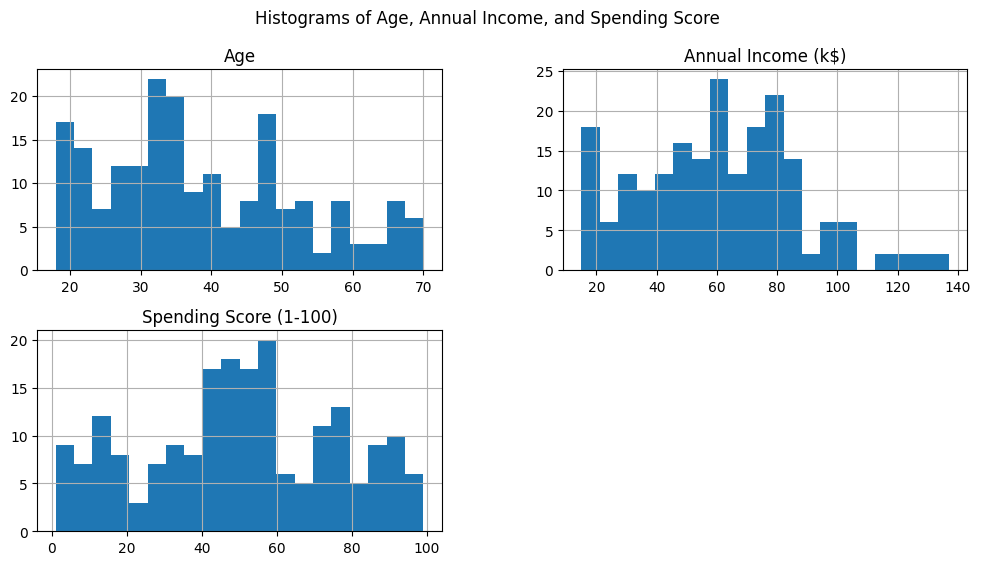

In [31]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Plot histograms for Age, Annual Income, and Spending Score
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(12, 6))
plt.suptitle('Histograms of Age, Annual Income, and Spending Score')
plt.show()

#### Convert Gender Column

We'll encode the Gender column using one-hot encoding. In this case, we'll set:
- 1 for Female
- 0 for Male


In [32]:
# One-hot encode 'Gender' with 1 for Female and 0 for Male
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Verify encoding
df[['Gender']].head()

,Gender
0,0
1,0
2,1
3,1
4,1


#### Standardizing the Data

We'll standardize the features to ensure they contribute equally to the clustering process. Standardization will scale the features to have a mean of 0 and a standard deviation of 1.

In [33]:
# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Convert scaled features back to a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.281035,-1.738999,1.195704,-1.128152
2,-1.352802,-1.700830,-1.715913,0.886405
3,-1.137502,-1.700830,1.040418,0.886405
4,-0.563369,-1.662660,-0.395980,0.886405


#### Applying KMeans and Determining the Optimal Number of Clusters

We'll apply KMeans clustering and use both the Elbow Method and Silhouette Score to determine the optimal number of clusters.

Silhouette Score for 2 clusters: 0.2776
Silhouette Score for 3 clusters: 0.2576
Silhouette Score for 4 clusters: 0.2901
Silhouette Score for 5 clusters: 0.2719
Silhouette Score for 6 clusters: 0.3348
Silhouette Score for 7 clusters: 0.3457
Silhouette Score for 8 clusters: 0.3728
Silhouette Score for 9 clusters: 0.3876
Silhouette Score for 10 clusters: 0.4208


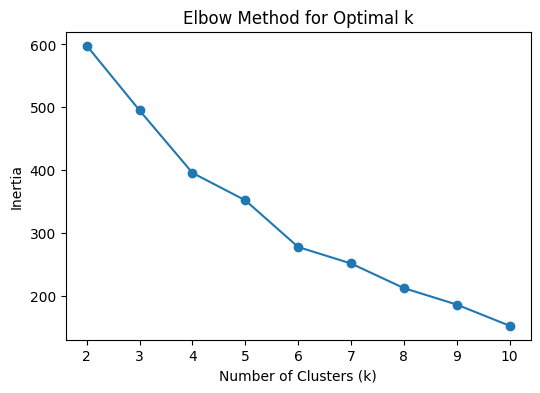

In [34]:
inertia = []
silhouette_scores = {}
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores[k] = silhouette_score(scaled_features, kmeans.labels_)

# Plot elbow of inertia values against clusters
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Print results
for k, score in silhouette_scores.items():
    print(f"Silhouette Score for {k} clusters: {score:.4f}")


**Key Takeaway**
- We are about to move ahead with 6 clusters as that is what is indicated by the elbow plot.
- As you notice, the silhouette score for 6 clusters is < 0.5, this is because silhouette scores work best when clusters are compact and well-separated (like circles)
- Clusters with data points that are spread out and close to other clusters will decrease the silhouette score even if clustering is useful

#### Applying KMeans with Optimal k

Based on the Elbow Plot, we'll apply KMeans using 6 clusters.

In [35]:
# Assuming optimal k is determined as 6
optimal_k = 6
# random_state ensures the same values re-running the code
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#### Analyzing Cluster Centers

We'll analyze the cluster centers to understand the characteristics of each cluster. We'll reverse the standardization to interpret the cluster centers in their original scale.

In [36]:
# Reverse scaling to interpret cluster centers in original units
# This reverses the standardization process, converting the cluster centers back to their original scale
# (e.g., actual Age, Annual Income, Spending Score, and Gender values) for easier interpretation.
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,57.214286,46.785714,38.714286,0.000000
1,39.000000,88.333333,14.428571,0.095238
2,28.410256,58.230769,70.717949,0.000000
3,33.206897,91.034483,72.137931,0.931034
4,25.888889,41.277778,57.944444,1.000000
5,49.914894,54.255319,36.531915,1.000000


[link text](https://)#### Visualizing Clusters with PCA

We'll apply PCA to reduce the data to 2 dimensions for visualization. This will help us visualize the clusters and understand the separation between them.

We'll also print a table of the PCA loadings to interpret how each feature contributes to the principal components.

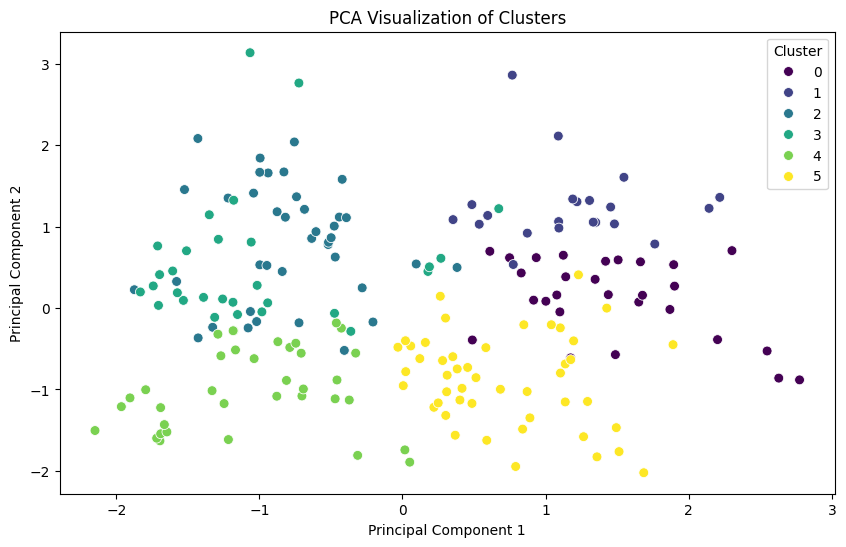

,PC1,PC2
Age,0.687900,-0.103690
Annual Income (k$),-0.006082,0.765252
Spending Score (1-100),-0.686920,0.103211
Gender,-0.234302,-0.626886


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Add PCA components to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plotting the clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# PCA Loadings
# Remember, the loadings help us with interpretation and understanding the
# influence of certain variables on compnents
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
loadings

**Reflecting on the Visualization and Loadings**

1. Which variables influence the clustering along PC1 and PC2?

  PC1 is influenced by: Age and Spending Score
  
  PC2 is influenced by: Annual Income and Gender

- Look at the loadings and relate them to the spread of clusters in the PCA plot.
2.	What do the clusters in different quadrants represent?
- Top-left quadrant?
  
  Low Age (younger individuals, since Age contributes positively to PC1)
  
  High Annual Income (since PC2 is positive, and income has a high positive loading on PC2)

- Bottom-right quadrant?

  High Age (older individuals, since Age contributes positively to PC1)

  Lower Annual Income (PC2 negative, meaning income is lower)

- Others?
3.	Does this clustering make sense given the loadings?


  Age vs. Spending Score correctly separates high spenders from low spenders.
  
  Income vs. Gender effect correctly separates high earners from low earners.

- Connect your observations from the plot with the actual customer characteristics.

## Balanced k-Means

### Why Balanced Clustering?
- **Problem:** Standard K-Means often results in **uneven cluster sizes**, making clusters **dominated by a few large groups**.
- **Solution:** Balanced K-Means enforces **roughly equal-sized clusters**, improving **fair representation**.

### Real-World Application
Balanced clustering is especially useful in:
- **Customer segmentation** (ensuring marketing targets all customer types equally).
- **Workload balancing** (fairly distributing computational resources).
- **Geospatial clustering** (grouping locations evenly).

Now, let's compare **Standard K-Means vs. Balanced K-Means** using our **scaled mall customer dataset**.




## Standard K-Means: Uneven Cluster Sizes (2 Features)

Now, let's cluster based only on 2 features, **Annual Income and Spending Score**, so that we can directly plot clusters in 2D without PCA and focus on the impact of balancing cluster sizes.

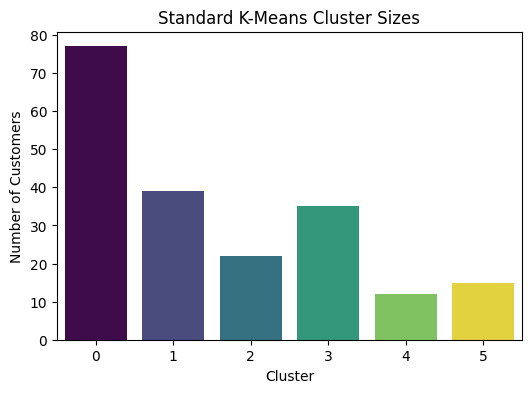

In [37]:
# Use only 2 key features
X_selected = scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Define number of clusters
k = 6

# Apply standard K-Means with 2 features
kmeans = KMeans(n_clusters=k, random_state=42)
scaled_df['Cluster_KMeans'] = kmeans.fit_predict(X_selected)

# Visualize cluster sizes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Cluster_KMeans", data=scaled_df, hue="Cluster_KMeans", palette="viridis", legend=False)
plt.title("Standard K-Means Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

**Some clusters are much larger or smaller than others, leading to unequal representation.**

### Balanced K-Means: Ensuring Equal Cluster Sizes

Now, we'll apply **Balanced K-Means** to enforce **even distribution** of customers across clusters.

We'll use `KMeansConstrained` from `k-means-constrained` (https://joshlk.github.io/k-means-constrained/).

In [38]:
# Install k-means-constrained if not installed
!pip install k-means-constrained

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: absl-py
    Found existing 

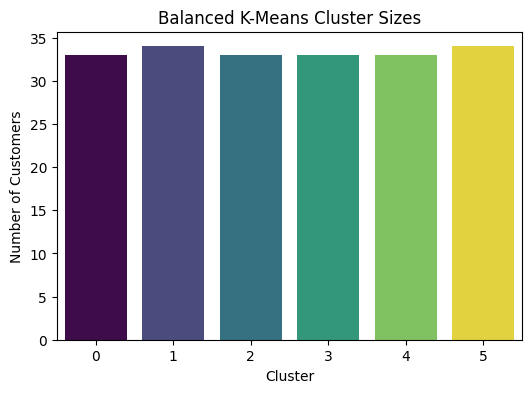

In [39]:
from k_means_constrained import KMeansConstrained

# Apply Balanced K-Means with 2 key features
balanced_kmeans = KMeansConstrained(n_clusters=k, size_min=int(len(X_selected) / k), size_max=int(len(X_selected) / k) + 1, random_state=42)
scaled_df['Cluster_BalancedKMeans'] = balanced_kmeans.fit_predict(X_selected)

# Visualize balanced cluster sizes
plt.figure(figsize=(6,4))
sns.countplot(x="Cluster_BalancedKMeans", data=scaled_df, hue="Cluster_BalancedKMeans", palette="viridis", legend=False)
plt.title("Balanced K-Means Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


Clusters are now basically evenly sized with minor variation due to rounding.

### Visualize k-Means versus Balanced k-Means

Let's compare how the two clustering methods distribute customer segments.

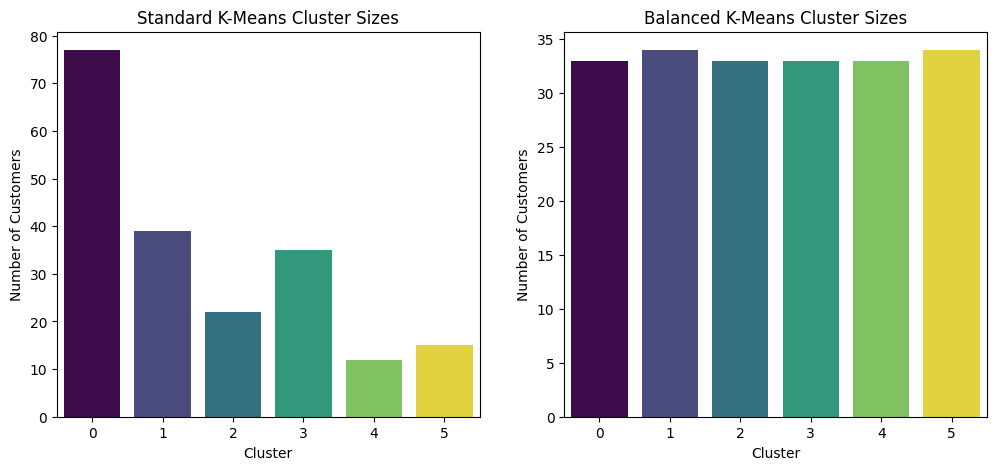

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Cluster_KMeans", data=scaled_df, ax=ax[0], hue="Cluster_KMeans", palette="viridis", legend=False)
ax[0].set_title("Standard K-Means Cluster Sizes")
ax[0].set_xlabel("Cluster")
ax[0].set_ylabel("Number of Customers")

sns.countplot(x="Cluster_BalancedKMeans", data=scaled_df, ax=ax[1], hue="Cluster_BalancedKMeans", palette="viridis", legend=False)
ax[1].set_title("Balanced K-Means Cluster Sizes")
ax[1].set_xlabel("Cluster")
ax[1].set_ylabel("Number of Customers")

plt.show()

Now let's look at the two versions of clusters through scatterplots.

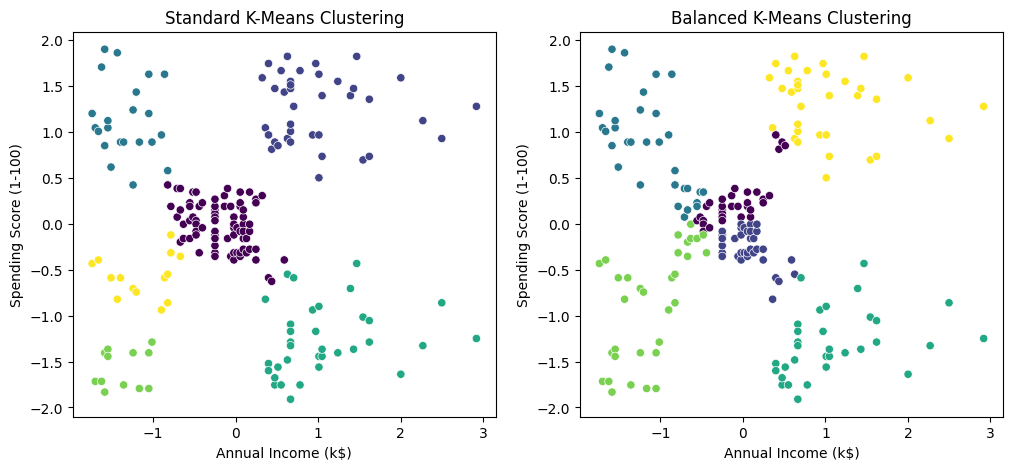

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Standard K-Means plot
sns.scatterplot(x=scaled_df['Annual Income (k$)'], y=scaled_df['Spending Score (1-100)'],
                hue=scaled_df['Cluster_KMeans'], palette='viridis', ax=ax[0], legend=False)
ax[0].set_title("Standard K-Means Clustering")

# Balanced K-Means plot
sns.scatterplot(x=scaled_df['Annual Income (k$)'], y=scaled_df['Spending Score (1-100)'],
                hue=scaled_df['Cluster_BalancedKMeans'], palette='viridis', ax=ax[1], legend=False)
ax[1].set_title("Balanced K-Means Clustering")

plt.show()